In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline

Halloween may be over but my favorite time of year is here - when candy is heavily discounted after Halloween! Let's look at a dataset that looks at how much people like different candies.

In [2]:
df = pd.read_csv('https://github.com/fivethirtyeight/data/raw/master/candy-power-ranking/candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


Each row in the dataset is a different candy. There are several categorial variables marked as either 1 or 0 that lets us know whether a certain candy fits in that category (1 being yes and 0 being no). For example, 100 grand has chocolate in it while Air Heads do not.

1) How many candies are in this dataset?

In [3]:
df.shape

(85, 13)

There are 85 candies in this dataset.

2) How many candies have chocolate in them? How many don't?

In [4]:
df['chocolate'].value_counts()

0    48
1    37
Name: chocolate, dtype: int64

In [5]:
df[df['chocolate'] == 1].shape

(37, 13)

In [6]:
df[df['chocolate'] == 0].shape

(48, 13)

37 candies have chocolate in them, while 48 do not.

3) Let's call the last column - the 'winpercent' column - equivalent to an approval rating for a given candy.

What is the mean 'approval rating' for candies with chocolate? What is the mean 'approval rating' for candies without chocolate? What is the difference in these mean approval ratings (with chocolate minus without chocolate)?

In [7]:
chocolate_winners = df[df['chocolate'] == 1]['winpercent']
non_chocolate_winners = df[df['chocolate'] == 0]['winpercent']

In [8]:
np.mean(chocolate_winners)

60.9215294054054

In [9]:
np.mean(non_chocolate_winners)

42.142257

In [10]:
np.mean(chocolate_winners) - np.mean(non_chocolate_winners)

18.7792724054054

4) Say that we want to see if there is a *difference* in approval rating between candies with chocolates and candies without chocolates. In this case, what is our null hypothesis and our alternate hypothesis?

Null hypothesis: The mean approval rating for candies with chocolates is the same as the mean approval rating for candies without chocolates.

Alternate hypothesis: The mean approval rating for candies with chocolates is *not the same* as the mean approval rating for candies without chocolates.

5) Now run a boostrapping example using 10,000 simulations. Use np.random.seed(42) to ensure consistency if you run again. Concatenate the chocolate approval ratings and non-chocolate approval ratings, shuffle them, and then break out new chocolate approval ratings and non-chocolate approval ratings, similar to what we did last week in class (**note that you can use the bootstrap_mean_diff function we covered this week in the class for running a bootstrap**). Record the mean difference between the chocolate approval ratings and non-chocolate approval ratings.

Plot a histogram of the 10,000 simulated differences recorded. What is the average simulated difference?

In [11]:
diff = utils.bootstrap_mean_diff(chocolate_winners, non_chocolate_winners)

Text(0.5, 0.92, 'Distribution of Simulated Mean Differences')

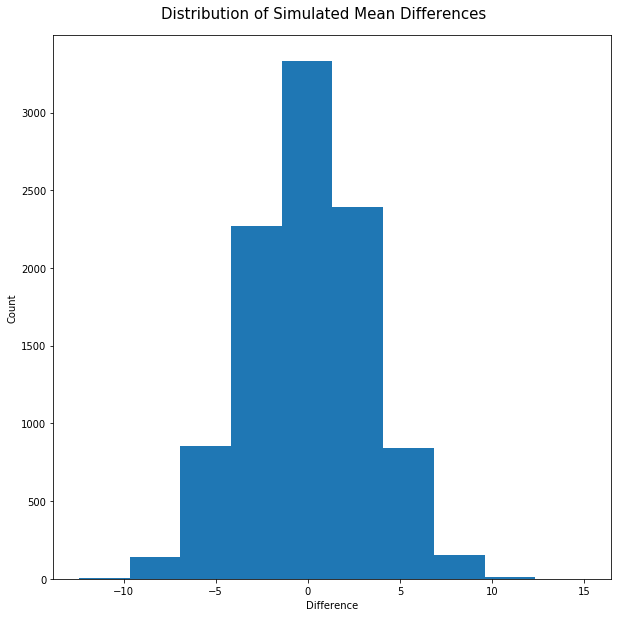

In [12]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff)
plt.xlabel('Difference')
plt.ylabel('Count')
fig.suptitle('Distribution of Simulated Mean Differences', fontsize=15, y=0.92)

In [13]:
np.mean(diff)

-0.005051429525618676

6) Say you are running a two-tailed hypothesis test, where the null hypothesis is that there is no difference in the approval rating for chocolate candies and non-chocolate candies, and the alternate hypothesis is that there is a difference in the approval rating.

If the test is at the 0.05 significance level, what are the rejection regions?

Where do the results you found earlier fit into the distribution? What is the percentile value? What is the p-value (remember, two-tailed)?

Can we reject the null hypothesis?

In [14]:
np.percentile(diff, 2.5)

-6.242496532446511

In [15]:
np.percentile(diff, 97.5)

6.322172290118249

In [16]:
stats.percentileofscore(diff, 18.77)

100.0

In [17]:
(1 - ((stats.percentileofscore(diff, 18.77))/100)) * 2

0.0

Yes, we can reject the null hypothesis, as the difference of 18.77 is in the rejection region and the p-value is 0.

7) Now let's use what we've learned the past two weeks. Plot a scatter plot between the percentage of sugar for *all* candies and the approval rating for *all* candies. What does the relationship look like? Do you think we need to transform the response variable?

Text(0.5, 0.92, 'Relationship Between % of Sugar and Approval Rating for Candy')

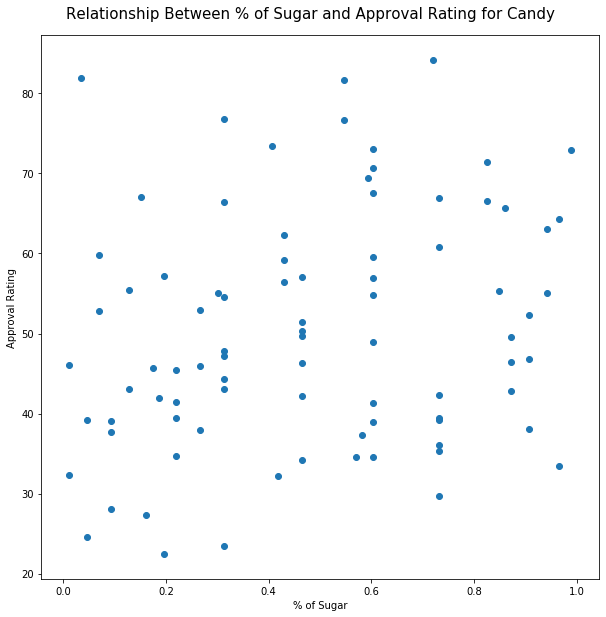

In [18]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['sugarpercent'], df['winpercent'])
plt.xlabel('% of Sugar')
plt.ylabel('Approval Rating')
fig.suptitle('Relationship Between % of Sugar and Approval Rating for Candy', fontsize=15, y=0.92)

8) What is the covariance between these two variables? What is the correlation? What does the correlation indicate about the strength of the relationship? Is the correlation statistically significant at a significance level of 0.05? (Note you do NOT have to calculate this, it is in the correlation output via stats.pearsonr)

In [19]:
np.cov(df['sugarpercent'], df['winpercent'])[0][1]

0.9534717450654493

In [20]:
stats.pearsonr(df['sugarpercent'], df['winpercent'])

(0.22915065712800653, 0.03489789676169812)

The covariance is 0.95 while the correlation is 0.23, which indicates a weak positive correlation. The correlation is, however, statistically significant with a p-value of 0.034

9) Using the 'evaluate linear relationship' package we found in class this week, find the slope, intercept, prediction and residuals for this relationship (with 'sugarpercent' being the X variable or independent variable and 'winpercent' being the Y variable or dependent variable. Re-plot the scatterplot with the predictive slope on top of it like we did in class.

In [21]:
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(df['sugarpercent'], df['winpercent'])

In [22]:
slope

11.923863286810722

In [23]:
intercept

44.60944180753465

Text(0.5, 0.92, 'Relationship Between % of Sugar and Approval Rating for Candy')

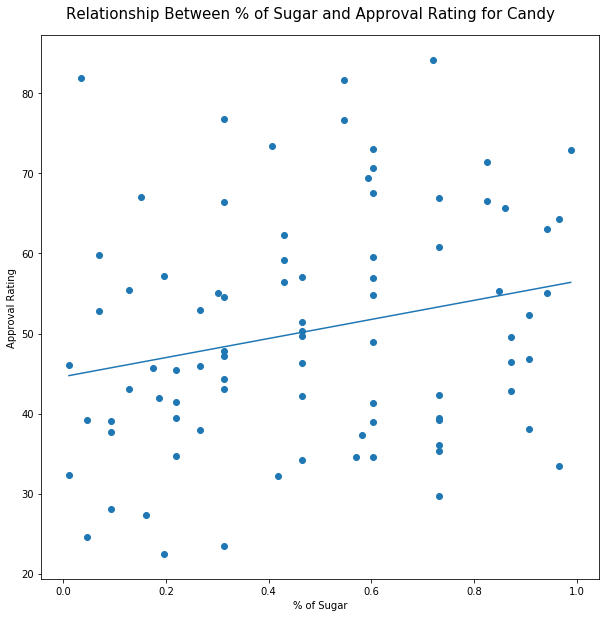

In [24]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['sugarpercent'], df['winpercent'])
sorted_order = np.argsort(df['sugarpercent'])
plt.plot(df['sugarpercent'][sorted_order], predictions[sorted_order])
plt.xlabel('% of Sugar')
plt.ylabel('Approval Rating')
fig.suptitle('Relationship Between % of Sugar and Approval Rating for Candy', fontsize=15, y=0.92)

10) Now plot the residuals for the model like we did in class.

Text(0.5, 0.92, 'Relationship Between % of Sugar and Approval Rating for Candy')

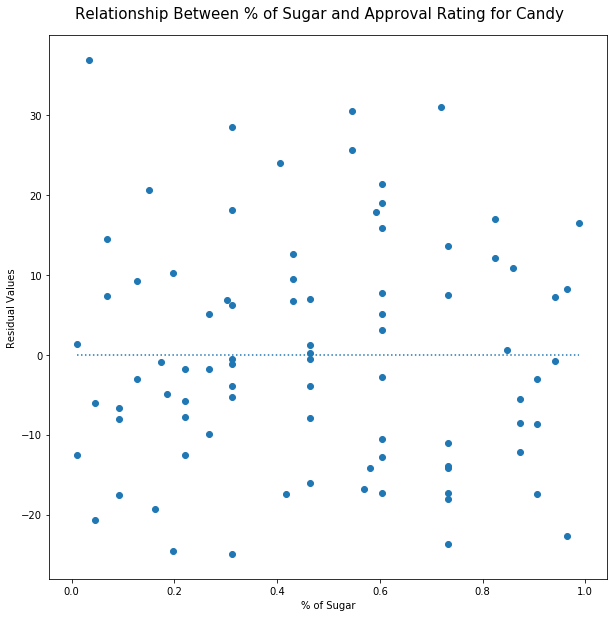

In [25]:
fig = plt.figure(figsize=(10,10))
plt.scatter(df['sugarpercent'], residuals)
sorted_order = np.argsort(df['sugarpercent'])
plt.plot([df['sugarpercent'].min(), df['sugarpercent'].max()], [0,0], linestyle='dotted')
plt.xlabel('% of Sugar')
plt.ylabel('Residual Values')
fig.suptitle('Relationship Between % of Sugar and Approval Rating for Candy', fontsize=15, y=0.92)

11) What is the R-squared value of the relationship between these two variables? What does this say when considered with the correlation of the two variables? (Consider what this plot looks like versus like the plots we went over in class)

In [26]:
np.power(stats.pearsonr(df['sugarpercent'], df['winpercent'])[0], 2)

0.05251002366219721

In [27]:
np.var(predictions) / np.var(df['winpercent'])

0.05251002366219716

The R-squared value is 0.05, which is extremely low. This makes sense given how spread out the observations are from the predictions. There is a statistically significant positive correlation: people like candy with more sugar, but using the level of sugar as a means of how much people will like a given candy.

BONUS: 12) Say we wanted to run the earlier hypothesis test (approval rating of chocolates vs. non-chocolates) with a two-sample T-test rather than a bootstrap test. 

Find the proper parameters for the T-distribution to test our null hypothesis. What is the mean, standard deviation, and degrees of freedom of our null hypothesis?

In [28]:
print('Degrees of Freedom:', len(chocolate_winners) + len(non_chocolate_winners) - 2)

Degrees of Freedom: 83


In [29]:
pooled_variance = utils.pooled_variance(chocolate_winners, non_chocolate_winners)
print('Pooled Variance:', pooled_variance)
print('Pooled Standard Deviation:', np.sqrt(pooled_variance))

Pooled Variance: 6.238276474759723
Pooled Standard Deviation: 2.4976541943911537


Mean: 0  
Standard Deviation: 2.49  
Degrees of Freedom: 83  

BONUS: 13) At a signifiance level of 0.05, what are the rejection region (s?) of our distribution? Make a plot highlighting these rejection region (s?) in red.

Rejection Region: Less than -4.97
Rejection Region: Greater than 4.97


Text(0.5, 0.92, 'T-Distribution of Difference Between Samples')

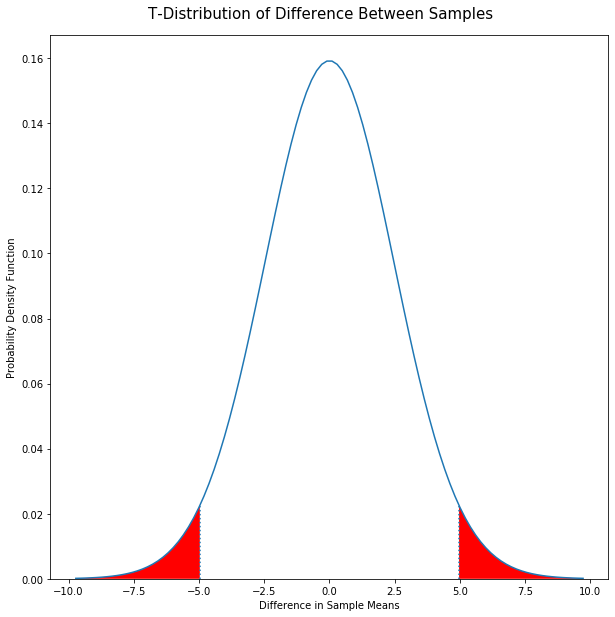

In [30]:
dist = stats.t(loc=0, scale=np.sqrt(pooled_variance), df=83)
print('Rejection Region: Less than', np.round(dist.ppf(0.025), 2))
print('Rejection Region: Greater than', np.round(dist.ppf(0.975), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Difference in Sample Means')
plt.ylabel('Probability Density Function')
fig.suptitle('T-Distribution of Difference Between Samples', fontsize=15, y=0.92)

BONUS: 14) At a significance level of 0.05, can we reject the null hypothesis? What is the p-value of our observed difference?

In [31]:
(1 - dist.cdf(18.7792724054054)) * 2

5.859690510590099e-11

Yes, we can reject the null hypothesis as the p-value is essentially 0.